Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [5]:

import pandas as pd
import matplotlib.pyplot as plt


# Load the Titanic dataset from its URL:
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [20]:
df['Fare'].min()

0.0

In [14]:
list(range(0,512,50))

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [ ]:
fig, ax = plt.subplots()
ax.hist(df['Fare'], bins=100)
ax.set_xticks(list(range(0,512,50)))
plt.show()

###1) What is the appropriate type of graph to answer the question "What was the typical fare paid for passage on the Titanic?"



> ### Histogram chart

###2) Create the display you visualization you selected in 2).  Don't forget to name the axes and give the figure a title. 

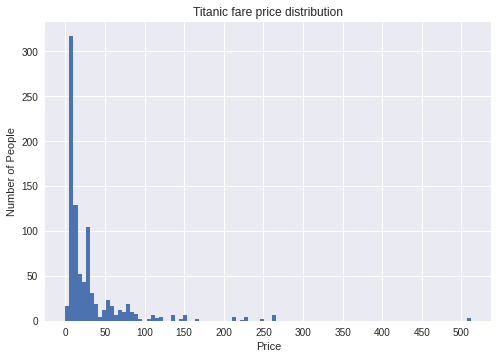

In [19]:
plt.style.use('seaborn')

fig, ax = plt.subplots()

ax.hist(df['Fare'], bins=100)
ax.set_xticks(list(range(0,512,50)))
ax.set_xlabel('Price')
ax.set_ylabel('Number of People')
ax.set_title('Titanic fare price distribution')

plt.show()

###3) Describe your results in a sentence or two.

> ### Typical fare paid by titanic passengers lies within 0 to 50 dollars


###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

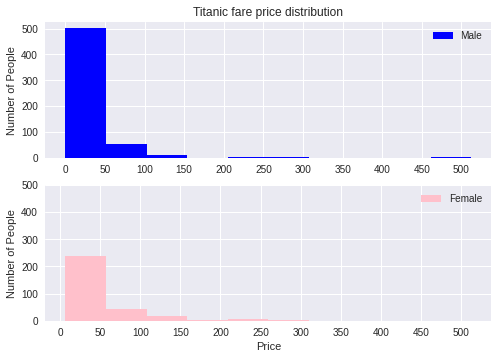

In [34]:
male_fare = df[df['Sex']=='male']['Fare']
female_fare = df[df['Sex']=='female']['Fare']


plt.style.use('seaborn')

fig, (ax_male, ax_female) = plt.subplots(nrows = 2)

ax_male.hist(male_fare, bins=10, color = 'blue', label = 'Male')
ax_female.hist(female_fare, bins=10, color = 'pink', label = 'Female')

ax_male.set_xticks(list(range(0,512,50)))
ax_male.set_ylabel('Number of People')
ax_male.set_title('Titanic fare price distribution')

ax_female.set_xticks(list(range(0,512,50)))
ax_female.set_xlabel('Price')
ax_female.set_ylabel('Number of People')
ax_female.set_ylim(0,500)


ax_female.legend()
ax_male.legend()
plt.show()

In [38]:
df['Sex'].value_counts()


male      573
female    314
Name: Sex, dtype: int64

dtype('int64')

###5) Describe the difference in distribution of fare paid between male and female passengers.


> Majority of female as well as majority of male purchased ticket for price within a range of 0 to 50 dollars. So typical fare price for both sexes appears to be in the same range. 



###6) Make a bar plot to show the frequency of individuals in each passenger class.

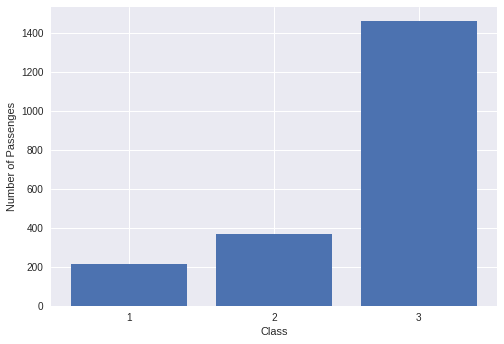

In [58]:
plt.style.use('seaborn')
fig, ax = plt.subplots()

first_class = df['Pclass'][df['Pclass'] == 1].sum()
second_class = df['Pclass'][df['Pclass'] == 2].sum()
third_class = df['Pclass'][df['Pclass'] == 3].sum()
x = [1,2,3]

ax.bar(x,[first_class,second_class,third_class])
ax.set_xticks([1,2,3])
ax.set_xlabel('Class')
ax.set_ylabel('Number of Passenges')
plt.show()


###7) Summarize your results from 6)

> Most of the passengers were in third class. 

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

In [62]:
df['Parents/Children_Aboard'].value_counts()

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children_Aboard, dtype: int64

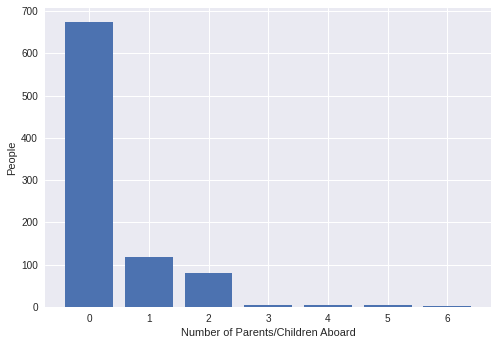

In [65]:
plt.style.use('seaborn')

fig, ax = plt.subplots()
x = [0,1,2,3,4,5,6]
y = df['Parents/Children_Aboard'].value_counts()
ax.bar(x,y)
ax.set_xlabel('Number of Parents/Children Aboard')
ax.set_ylabel('People')
plt.show()


###9) Summarize your results from 8).  Did most individuals travel alone or with family?

> Most individuals were travelling alone

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [72]:
df['18_or_older'] = df['Age']>=18
df['18_or_older'] = df['18_or_older'].apply(lambda x: "Adult" if x else "Child")


In [74]:
df.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare,18_or_older
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,Adult
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,Adult
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,Adult
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,Adult
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,Adult


###11) Make a cross-tab of survival by age (child vs adult).

In [76]:
pd.crosstab(df['Survived'],df['18_or_older'])

18_or_older,Adult,Child
Survived,,
0,480,65
1,277,65


###12) Create a new data frame to hold the data for the figure.

In [79]:
df['18_or_older'].value_counts()['Adult']

757

In [77]:
df1 = pd.crosstab(df['Survived'],df['18_or_older'])

###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

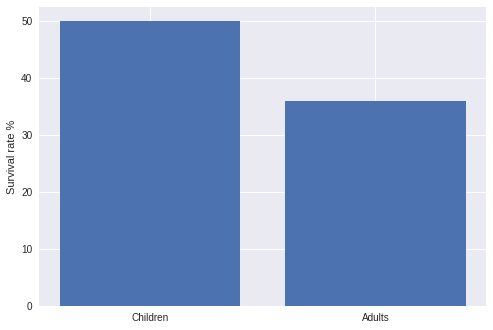

In [81]:
plt.style.use('seaborn')

fig, ax = plt.subplots()

adult_total = df['18_or_older'].value_counts()['Adult']
child_total = df['18_or_older'].value_counts()['Child']
adult_survived = df1['Adult'][1]
child_survived = df1['Child'][1]
x = ['Children', 'Adults']
y = [int(child_survived/child_total*100),int(adult_survived/adult_total*100) ]
ax.bar(x,y)
ax.set_ylabel('Survival rate %')

plt.show()


###14) Summarize your results about passenger survival by age.

> Children were more likely to survive in Titanic crash

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)